<a href="https://colab.research.google.com/github/vsilchev/hse-intro-ml/blob/master/Seminar_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

In [0]:
def print_model(model, columns):
    l = list(zip(columns, model.coef_))
    for col, coef in sorted(l, key=lambda x: abs(x[1]), reverse=True):
        print("{}: {}".format(col, coef))
    print("Intercept: {}".format(model.intercept_))

In [0]:
df = pd.read_csv('bike_sharing_demand.csv', parse_dates=['datetime'])

# generate datetime features
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

In [5]:
print(df.shape)
df.head()

(10886, 15)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1,4


In [0]:
useless_cols = ['datetime', 'casual', 'registered', 'count', 'atemp', 'season']

In [0]:
one_hot_transformer = OneHotEncoder(sparse=False)

In [0]:
month_encoded =  one_hot_transformer.fit_transform(df[['month']].values)

In [48]:
month_encoded.shape

(10886, 12)

In [49]:
one_hot_transformer.get_feature_names()

array(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8',
       'x0_9', 'x0_10', 'x0_11', 'x0_12'], dtype=object)

In [50]:
month_names = ['month_' + str(n) for n in one_hot_transformer.categories_[0]]
len(month_names)

12

In [51]:
month_df = pd.DataFrame(data=month_encoded, columns=month_names)
month_df.shape

(10886, 12)

In [52]:
month_df.head()

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
joined_df = pd.concat((month_df, df.drop(columns=useless_cols + ['month'])), axis=1)

In [55]:
joined_df.head()

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday,workingday,weather,temp,humidity,windspeed,dayofweek,hour
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,9.84,81,0.0,5,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,9.02,80,0.0,5,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,9.02,80,0.0,5,2
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,9.84,75,0.0,5,3
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,9.84,75,0.0,5,4


In [0]:
poly_transform = PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly_transform.fit_transform(joined_df)
poly_names = poly_transform.get_feature_names(joined_df.columns)

In [57]:
type(poly_features)

numpy.ndarray

In [66]:
poly_df = pd.DataFrame(data=poly_features, columns=poly_names)
poly_df.shape

(10886, 230)

In [0]:
poly_df = poly_df.loc[:, (poly_df != poly_df.iloc[0]).any()]
poly_names = poly_df.columns

In [68]:
poly_df.shape

(10886, 157)

In [0]:
Y = df['count']
X_poly_train, X_poly_test, Y_train, Y_test = train_test_split(poly_df.values, Y, shuffle=False)

In [70]:
my_little_poly = Lasso(alpha=2.0).fit(X_poly_train, Y_train)
print_model(my_little_poly, poly_names)
mean_squared_error(Y_test, my_little_poly.predict(X_poly_test))

hour: 30.616840504593256
temp: 9.314170768326969
month_5 temp: 5.335736077462036
month_6 windspeed: 3.6680706003460912
month_4 temp: 3.6030709871889055
workingday temp: -3.3502922764661833
weather dayofweek: 3.13083598070847
weather^2: -2.7918662816919766
month_3 temp: 2.5241724504235608
humidity: 2.2181458362492212
month_2 temp: -2.1096337341667257
month_8 hour: -1.7214014739666932
month_7 hour: -1.480296550774375
month_12 hour: 1.4380820510774257
month_10 temp: 1.3899121434636725
hour^2: -1.1908269131230778
month_3 hour: -1.0306621546799593
workingday humidity: 0.9962624842647498
month_5 humidity: -0.9610108321883788
weather temp: -0.8330388483294303
month_3 windspeed: -0.7151554014787558
month_4 humidity: -0.7037541859357187
month_8 windspeed: 0.673263426397904
weather hour: -0.6506097186100728
month_2 humidity: 0.6226838793233181
workingday hour: 0.6210715910752342
month_2 windspeed: -0.6127240481344418
temp hour: 0.5137656382033434
month_11 hour: 0.45987477533925486
weather windsp

34513.09702699656

In [0]:
sorted_cols = [name
               for name, val
               in sorted(zip(poly_names, my_little_poly.coef_), key=lambda x: abs(x[1]), reverse=True)]

In [72]:
len(sorted_cols)

157

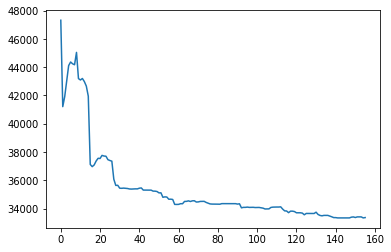

In [73]:
col_num = range(1, len(sorted_cols))
loss_array = []

for i in col_num:
    X_poly_train, X_poly_test, Y_train, Y_test = train_test_split(poly_df[sorted_cols[:i]], Y, shuffle=False)
    loss_array.append(mean_squared_error(Y_test, LinearRegression().fit(X_poly_train, Y_train).predict(X_poly_test)))

plt.plot(loss_array)